In [1]:

!git clone -b EMT https://github.com/pop756/Quantum_KAN.git
%cd Quantum_KAN
!pip install -r requirements.txt

Cloning into 'Quantum_KAN'...
remote: Enumerating objects: 801, done.
remote: Counting objects: 100% (801/801), done.
remote: Compressing objects: 100% (746/746), done.
remote: Total 801 (delta 102), reused 736 (delta 52), pack-reused 0
Receiving objects: 100% (801/801), 16.69 MiB | 24.00 MiB/s, done.
Resolving deltas: 100% (102/102), done.
/content/Quantum_KAN
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 41.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 14.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.9/249.9 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.8/191.8 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━

In [1]:
import qiskit
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
import numpy as np

def create_trotterized_ising_model_circuit(num_qubits, trotter_steps, time):
    """
    Trotterization을 사용하여 Ising 모델의 양자 서킷을 생성합니다.
    각 Rz 게이트의 파라미터는 Qiskit Parameter로 동적으로 설정됩니다.

    Parameters:
    - num_qubits: 큐비트의 수
    - trotter_steps: Trotterization 단계 수
    - time: 진화 시간

    Returns:
    - QuantumCircuit: 생성된 양자 서킷
    - dict: 서킷 파라미터 사전
    """
    qc = QuantumCircuit(num_qubits)
    delta_t = time / trotter_steps

    # 파라미터 설정
    h_params = [Parameter(f'h_{i}') for i in range(num_qubits)]
    J_params = [[Parameter(f'J_{i}_{j}') for j in range(num_qubits)] for i in range(num_qubits)]

    for _ in range(trotter_steps):
        # 자기 상호작용 항목 추가
        for i in range(num_qubits):
            qc.rx(2 * h_params[i] * delta_t, i)

        # 스핀 간 상호작용 항목 추가
        for i in range(num_qubits):
            for j in range(i + 1, num_qubits):
                if J_params[i][j] != 0:
                    qc.cx(i, j)
                    qc.rz(2 * J_params[i][j] * delta_t, j)
                    qc.cx(i, j)

    return qc, h_params, J_params

def create_trotterized_ising_model_circuit_train(num_qubits, trotter_steps, time):
    """
    Trotterization을 사용하여 Ising 모델의 양자 서킷을 생성합니다.
    각 Rz 게이트의 파라미터는 Qiskit Parameter로 동적으로 설정됩니다.

    Parameters:
    - num_qubits: 큐비트의 수
    - trotter_steps: Trotterization 단계 수
    - time: 진화 시간

    Returns:
    - QuantumCircuit: 생성된 양자 서킷
    - dict: 서킷 파라미터 사전
    """
    qc = QuantumCircuit(num_qubits)
    delta_t = time / trotter_steps

    # 파라미터 설정
    h_params = [Parameter(f'h_{i}') for i in range(num_qubits)]
    J_params = [[Parameter(f'J_{i}_{j}') for j in range(num_qubits)] for i in range(num_qubits)]

    for _ in range(trotter_steps):
        # 자기 상호작용 항목 추가
        for i in range(num_qubits):
            qc.rx(2 * h_params[i] * delta_t, i)

        # 스핀 간 상호작용 항목 추가
        for i in range(num_qubits):
            for j in range(i + 1, num_qubits):
                if J_params[i][j] != 0:
                    qc.rz(2 * J_params[i][j] * delta_t, j)
    return qc, h_params, J_params

# 파라미터 설정
num_qubits = 4
trotter_steps = 2  # Trotterization 단계 수
time = 1.0  # 진화 시간

# Trotterization을 사용한 Ising 모델 서킷 생성
trotterized_ising_circuit, h_params, J_params = create_trotterized_ising_model_circuit(num_qubits, trotter_steps, time)
trotterized_ising_circuit_train, h_params, J_params = create_trotterized_ising_model_circuit_train(num_qubits, trotter_steps, time)




![image.png](attachment:image.png)


사용할것 : 37~43

In [2]:
# Initialize your account
from qiskit_ibm_runtime import QiskitRuntimeService
import qiskit_ibm_provider
from qiskit_aer import AerSimulator
service = QiskitRuntimeService(channel='ibm_quantum',
    instance='ibm-q-skku/skku/skku-students',
    token = '06f802eeac992c43c4106753d7c5fc31414a13eb7d91c99d67fb49cc50569e5b4b011f20c71b9607a07cb43ecc7044557c699022db91d1685ba4c886d5886854')

backend_name = 'ibm_kyiv'
backend_error = service.backend(backend_name)

<ipython-input-2-4b9fc148b909>:3: DeprecationWarning: The package qiskit_ibm_provider is being deprecated. Please see https://docs.quantum.ibm.com/api/migration-guides/qiskit-runtime to get instructions on how to migrate to qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  import qiskit_ibm_provider


In [3]:
from qiskit import pulse
from qiskit.pulse.library import Gaussian


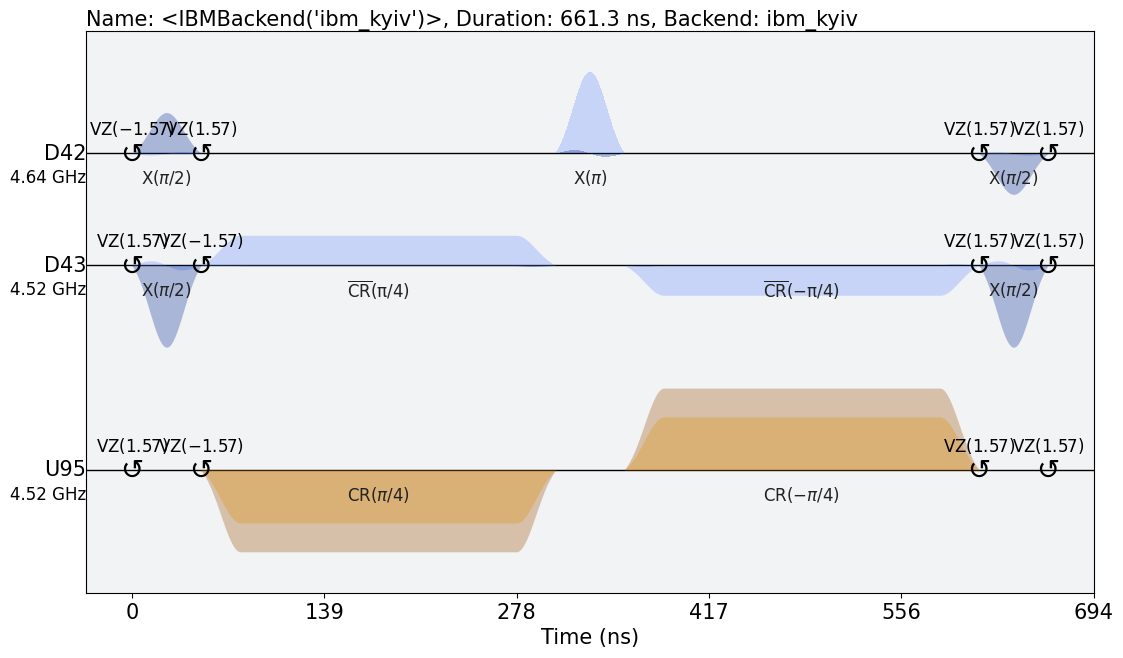

In [4]:
from qiskit import QuantumCircuit
from qiskit import pulse
from qiskit import schedule
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import Options
passmanager = generate_preset_pass_manager(optimization_level=0, backend=backend_error, initial_layout=[43, 42])


qubit_use = [37,38,39,40,41,42,43]
circ = QuantumCircuit(2, 2)
circ.ecr(0, 1)
from qiskit import transpile
circ = passmanager.run(circ,backend_error)
pulse_schedule = schedule(circ,backend=backend_error)
pulse_schedule.draw(backend=backend_error)

In [5]:
init_list = []
for item in backend_error.target['ecr']:
    if item[0] in qubit_use and item[1] in qubit_use:
        init_list.append(item)

In [6]:
import copy
from qiskit_ibm_runtime.fake_provider import FakePerth
from qiskit.circuit import QuantumCircuit, Gate
from qiskit.pulse import builder, DriveChannel
from qiskit.transpiler import InstructionProperties
from qiskit_ibm_runtime import QiskitRuntimeService, EstimatorV2,SamplerV2
from qiskit_ibm_runtime import Session
l = 2
init = '11'


error_gate = Gate(f"error", 2, [])
qc1 = QuantumCircuit(2, 2)
if init[0] == '1':
  qc1.x(0)
if init[1] == '1':
  qc1.x(1)
qc1.ecr(0,1)
qc1.ecr(0,1)
qc1.measure(0,0)
qc1.measure(1,1)

def update_ecr(l,init_list,backend):
  layouts = {}
  for initial_layout in init_list:
    custom_gate = Gate(f"error", 2, [])
    pulse_schedule = backend.target['ecr'][initial_layout].calibration
    pulse_copy = copy.deepcopy(pulse_schedule)
    with pulse.build(backend, name=f'err_{initial_layout}') as real_pulse:
        index=0
        for pul in pulse_schedule.instructions:
            if index == 0:
              duration = pul[1].pulse.duration
              width = pul[1].pulse._params['width']
              x_duration = pulse_copy.instructions[2][1].pulse.duration
              sigma = pul[1].pulse._params['sigma']




            try:
              pul[1].pulse._params['width']
              pul[1].pulse.duration = duration
              pul[1].pulse._params['sigma'] = sigma
              pul[1].pulse._params['width'] = width
              pulse.play(pul[1].pulse,pul[1].channel)
              if index<2:
                pulse.delay(x_duration,pul[1].channel)
              index+=1
            except:
              pass


    with pulse.build(backend, name=f'err_{initial_layout}') as my_schedule:
        index=0
        for pul in pulse_copy.instructions:
            if index == 0:
              duration = int(round(pul[1].pulse.duration*l/16)*16)
              width = int(pul[1].pulse._params['width']*l)
              x_duration = int(round(pulse_copy.instructions[2][1].pulse.duration/16)*16)
              sigma = int(pul[1].pulse._params['sigma']*l)




            try:
              pul[1].pulse._params['width']
              pul[1].pulse.duration = duration
              pul[1].pulse._params['sigma'] = sigma
              pul[1].pulse._params['width'] = width
              pulse.play(pul[1].pulse,pul[1].channel)
              if index<2:
                pulse.delay(x_duration,pul[1].channel)
              index+=1
            except:
              pass

    layouts[initial_layout] = InstructionProperties(calibration=my_schedule)

    backend.target.update_instruction_properties(f'ecr',initial_layout,properties = InstructionProperties(calibration=(real_pulse+my_schedule)))
  backend.target.add_instruction(
      custom_gate,
      layouts,
  )


  return my_schedule,real_pulse


my_schedule,pulse_real = update_ecr(l,init_list,backend_error)
initial_layout = init_list[1]
passmanager = generate_preset_pass_manager(optimization_level=0, backend=backend_error, initial_layout=list(initial_layout))
qc1 = passmanager.run(qc1)


In [7]:
np.random.seed(30)
theta = np.random.uniform(-3.14, 3.14, [100,10])

In [29]:
import pennylane as qml
# PennyLane 디바이스 설정 (Qiskit Aer 백엔드를 사용)
my_qfunc = qml.from_qiskit(trotterized_ising_circuit_train)

dev = qml.device("default.qubit",wires=[0,1,2,3])

@qml.qnode(dev)
def circuit(theta):
  theta_list = []
  for the in theta:
    theta_list.append(the)
  my_qfunc(*theta_list,wires=[0,1,2,3])
  return qml.expval(qml.Z(0)+qml.Z(1)+qml.Z(2)+qml.Z(3))

In [30]:
label_list = []
for i in range(100):
  res = circuit(theta[i])
  label_list.append(res.numpy())

In [31]:
label_list

[2.375796886179777,
 -0.3567436076531525,
 2.9055961491814397,
 -0.006384410749454561,
 1.2500276951497022,
 0.40415100329327314,
 0.934547711817451,
 0.30267698167994056,
 -0.48725035792165855,
 0.9204973043449488,
 2.1320721736567334,
 2.815573486624343,
 1.6700849635699258,
 1.303806423388611,
 1.5117691729005758,
 2.8088121402069284,
 0.1283165600455058,
 1.489644795652418,
 0.28522715636255236,
 2.107947918695198,
 2.2913911092618284,
 2.470471650974191,
 0.945832750158914,
 3.2496705683616223,
 3.100494105644689,
 0.20277583596569604,
 0.3966086721281281,
 3.1635112500311546,
 1.3251094403899153,
 2.1874828371996795,
 2.224905795424962,
 3.425449245127821,
 0.2779327757094191,
 3.5576592597182968,
 2.5360469240661687,
 0.4500666937683808,
 1.4458181238330037,
 1.45264586055466,
 1.7042592739576015,
 3.23072761525604,
 2.172545290960372,
 3.43786393292973,
 1.593197016399364,
 3.144701940265633,
 1.86895525036376,
 1.8163644038501126,
 1.4231067287009829,
 2.5709522754895504,
 3.6

In [32]:
import pennylane as qml
# PennyLane 디바이스 설정 (Qiskit Aer 백엔드를 사용)
my_qfunc = qml.from_qiskit(trotterized_ising_circuit)

dev = qml.device("default.qubit",wires=[0,1,2,3])

@qml.qnode(dev)
def circuit(theta):
  theta_list = []
  for the in theta:
    theta_list.append(the)
  my_qfunc(*theta_list,wires=[0,1,2,3])
  return qml.expval(qml.Z(0)+qml.Z(1)+qml.Z(2)+qml.Z(3))

In [33]:
label_list_valid = []
for i in range(100):
  res = circuit(theta[i])
  label_list_valid.append(res.numpy())

In [34]:
label_list_valid

[1.594904602532277,
 0.6677111619170045,
 2.819361169289324,
 1.2063840113049316,
 2.2703833445989554,
 2.3727685444512967,
 1.8065335241191578,
 2.0651372958550813,
 1.3333845975802343,
 0.9767171903733385,
 2.397498574720111,
 3.034407890465792,
 2.131505906780836,
 1.623591991006879,
 2.101831529167439,
 2.1713514753601784,
 1.0191981898929732,
 2.7841463859317397,
 0.5959633325530684,
 3.360405014892067,
 3.4908512116845505,
 2.4094695564328306,
 1.2317263889138956,
 2.4130159740863726,
 2.5669136691779637,
 0.4432400139281495,
 2.638539365926689,
 3.4513828538781026,
 1.0016165500852918,
 2.9110220490891856,
 2.347982585382242,
 2.898899604642399,
 2.380068625515761,
 3.592754538074727,
 2.239743049834867,
 1.3690612744032362,
 0.9610741248191155,
 1.428578439956457,
 3.1046092435556,
 3.983361596550183,
 1.6261331143130207,
 2.9481769580689474,
 3.0912056007939714,
 2.8974692725120086,
 2.43017459177286,
 1.8217982803790527,
 2.9936149569464114,
 2.7134760950089367,
 3.7000658149

In [35]:
import pandas as pd
lable_dict = {'train':label_list,'valid':label_list_valid}

In [40]:
data = pd.DataFrame(lable_dict)
data

,train,valid
0,2.375797,1.594905
1,-0.356744,0.667711
2,2.905596,2.819361
3,-0.006384,1.206384
4,1.250028,2.270383
...,...,...
95,3.489584,2.172917
96,2.137092,3.315807
97,3.740771,3.256711
98,3.567536,2.554875


In [44]:
%cd Quantum_KAN
data.to_csv('./data/real_data.csv',index=False)

/content/Quantum_KAN


In [ ]:
import pickle

with open()

In [ ]:

passmanager = generate_preset_pass_manager(optimization_level=0, backend=backend_error, initial_layout=[37,38,39,40])

from qiskit.quantum_info import SparsePauliOp
"""
qc_list = []
for i in range(20):
    qc1 = QuantumCircuit(2, 2)
    if init[0] == '1':
        qc1.x(0)
    if init[1] == '1':
        qc1.x(1)
    #qc1.ecr(0,1)
    #qc1.ecr(0,1)
    for j in range(i):
        qc1.ecr(0,1)
        qc1.ecr(0,1)
    qc1.measure(0,0)
    qc1.measure(1,1)
    qc1 = passmanager.run(qc1)
    qc_list.append(qc1)"""
np.random.seed(30)
theta = np.random.uniform(-3.14, 3.14, [100,10])
hamiltonian = SparsePauliOp.from_list([("ZIII", 1), ("IZII", 1), ("IIZI", 1),("IIIZ", 1)])
qc_input = passmanager.run(trotterized_ising_circuit)
isa_observables = hamiltonian.apply_layout(qc_input.layout)
with Session(backend=backend_error,) as session:
  estimator = EstimatorV2(session=session)
  estimator.resilience_level = 1
  #job = estimator.run([(qc_input, isa_observables, theta[i]) for i in range(100)])
  #job = sampler.run(qc_list,shots=8000)
  #job.update_tags(['ecr',f"l={1+l}"])

In [ ]:
service = QiskitRuntimeService(channel='ibm_quantum',
    instance='ibm-q-skku/skku/skku-students',
    token = '06f802eeac992c43c4106753d7c5fc31414a13eb7d91c99d67fb49cc50569e5b4b011f20c71b9607a07cb43ecc7044557c699022db91d1685ba4c886d5886854')


backend = service.backend(backend_name)

In [ ]:
passmanager = generate_preset_pass_manager(optimization_level=0, backend=backend, initial_layout=list(initial_layout))


qubit_use = [37,38,39,40,41,42,43]
circ = QuantumCircuit(2, 2)
circ.ecr(0, 1)
from qiskit import transpile
circ = passmanager.run(circ,backend)
pulse_schedule = schedule(circ,backend=backend)
pulse_schedule.draw(backend=backend)

In [ ]:
import copy
from qiskit_ibm_runtime.fake_provider import FakePerth
from qiskit.circuit import QuantumCircuit, Gate
from qiskit.pulse import builder, DriveChannel
from qiskit.transpiler import InstructionProperties
from qiskit_ibm_runtime import QiskitRuntimeService, EstimatorV2,SamplerV2
from qiskit_ibm_runtime import Session
l = 1.5
init = '11'


error_gate = Gate(f"error", 2, [])
qc1 = QuantumCircuit(2, 2)
if init[0] == '1':
  qc1.x(0)
if init[1] == '1':
  qc1.x(1)
qc1.ecr(0,1)
qc1.ecr(0,1)
qc1.measure(0,0)
qc1.measure(1,1)

def update_ecr_real(l,init_list,backend):
  layouts = {}
  if l == 0:
    pass
  else:
    for initial_layout in init_list:
      custom_gate = Gate(f"error", 2, [])
      pulse_schedule = backend.target['ecr'][initial_layout].calibration
      pulse_copy = copy.deepcopy(pulse_schedule)
      with pulse.build(backend, name=f'err_{initial_layout}') as real_pulse:
          index=0
          for pul in pulse_schedule.instructions:
              if index == 0:
                duration = pul[1].pulse.duration
                x_duration = pulse_copy.instructions[2][1].pulse.duration
                pulse.delay(duration,pulse_schedule.instructions[2][1].channel)


              pulse.play(pul[1].pulse,pul[1].channel)
              if index<2:
                pulse.delay(x_duration,pul[1].channel)
              index+=1

      with pulse.build(backend, name=f'err_{initial_layout}') as my_schedule:
          index=0
          for pul in pulse_copy.instructions:
              if index == 0:
                duration = int(round(pul[1].pulse.duration*l/16)*16)
                width = int(pul[1].pulse._params['width']*l)
                x_duration = int(round(pulse_copy.instructions[2][1].pulse.duration/16)*16)
                sigma = int(pul[1].pulse._params['sigma']*l)




              try:
                pul[1].pulse._params['width']
                pul[1].pulse.duration = duration
                pul[1].pulse._params['sigma'] = sigma
                pul[1].pulse._params['width'] = width
                pulse.play(pul[1].pulse,pul[1].channel)
                if index<2:
                  pulse.delay(x_duration,pul[1].channel)
                index+=1
              except:
                pass

      layouts[initial_layout] = InstructionProperties(calibration=my_schedule)

      backend.target.update_instruction_properties(f'ecr',initial_layout,properties = InstructionProperties(calibration=(real_pulse+my_schedule)))





update_ecr_real(l,init_list,backend)
initial_layout = init_list[1]
passmanager = generate_preset_pass_manager(optimization_level=0, backend=backend, initial_layout=list(initial_layout))
qc1 = passmanager.run(qc1)


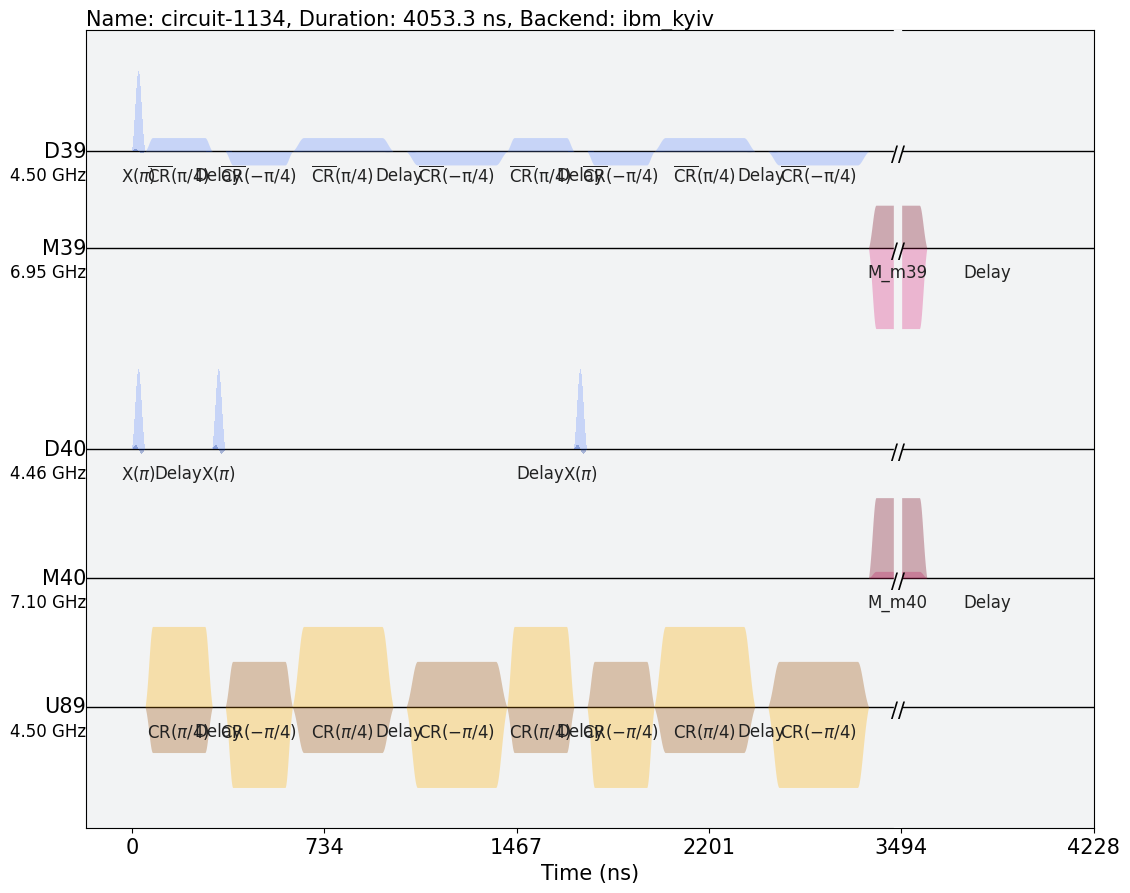

In [ ]:
schedule(qc1,backend=backend).draw(backend=backend)

In [ ]:
passmanager = generate_preset_pass_manager(optimization_level=0, backend=backend, initial_layout=[37,38,39,40])

from qiskit.quantum_info import SparsePauliOp
"""
qc_list = []
for i in range(20):
    qc1 = QuantumCircuit(2, 2)
    if init[0] == '1':
        qc1.x(0)
    if init[1] == '1':
        qc1.x(1)
    #qc1.ecr(0,1)
    #qc1.ecr(0,1)
    for j in range(i):
        qc1.ecr(0,1)
        qc1.ecr(0,1)
    qc1.measure(0,0)
    qc1.measure(1,1)
    qc1 = passmanager.run(qc1)
    qc_list.append(qc1)"""
np.random.seed(30)
theta = np.random.uniform(-3.14, 3.14, [100,10])
hamiltonian = SparsePauliOp.from_list([("ZIII", 1), ("IZII", 1), ("IIZI", 1),("IIIZ", 1)])
qc_input = passmanager.run(trotterized_ising_circuit)
isa_observables = hamiltonian.apply_layout(qc_input.layout)



with Session(backend=backend) as session:
  estimator = EstimatorV2(session=session)
  estimator.resilience_level = 1
  job = estimator.run([(qc_input, isa_observables, theta[i]) for i in range(100)])
  #job = sampler.run(qc_list,shots=8000)
  job.update_tags(['ecr',f"l={1+l}"])